Collatz binary notebook

In [1]:
"""
This notebook analyses collatz sequences from a binary perspective.
"""

# Imports
import random as rnd
from math import log2
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 3
MAX_ITERATIONS = 600
PRINT_TABLE = True

START_VALUE = rnd.randint(1, MAX_VALUE)

if START_VALUE % 2 == 0:
    START_VALUE = START_VALUE + 1

# START_VALUE = int('1010100001', 2)
# START_VALUE = int('10101010101', 2) # Best Case
# START_VALUE = int('11111111111', 2) # Worst Case
# START_VALUE = int('1111', 2)
# START_VALUE = int('1110010111111', 2) # High Beta
# START_VALUE = 99999
# START_VALUE = 15

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

# Filter odd values
analysis_frame = analysis_frame[analysis_frame["odd"] == 1]
analysis_frame = analysis_frame.reset_index(drop=True)

# Derive new fields
analysis_frame["v1"] = START_VALUE
analysis_frame["vi_log"] = analysis_frame["collatz"].apply(log2)
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame["beta"] = 1 + 1 / (K_FACTOR * analysis_frame["collatz"]) 
analysis_frame["beta_prod"] = analysis_frame["beta"].cumprod() 

analysis_frame["alpha"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha"] = analysis_frame["alpha"].astype("int64")
analysis_frame["alpha_sum"] = analysis_frame["alpha"].cumsum()
analysis_frame["alpha_pred"] = (log2(K_FACTOR) * analysis_frame["n"]).astype('int64') + 1
analysis_frame["alpha_diff"] = analysis_frame["alpha_sum"] - analysis_frame["alpha_pred"]
analysis_frame["alpha_max"] = \
    log2(START_VALUE) + (analysis_frame["n"] * log2(K_FACTOR))
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

bin_len1 = len(analysis_frame["bin_str"][0])
analysis_frame["bin_len1"] = bin_len1
analysis_frame["next_bin_str"] = analysis_frame["next_odd"].apply(com.to_binary)
analysis_frame["next_bin_len"] = analysis_frame["next_bin_str"].apply(len)
analysis_frame["bin_growth"] = analysis_frame["next_bin_len"] - bin_len1

# Print data
beta_max = analysis_frame["beta_prod"].max()

print_frame = analysis_frame[[
    "n", "v1", "collatz", "vi_log", "next_odd", "alpha_sum", "alpha_pred", "alpha_max", 
    "beta", "beta_prod", "bin_str", "bin_len", "bin_growth"]]

print_frame.columns = [
    "n","v1", "vi", "vi_log", "vi+1", 
    "a", "a_pred", "a_max", "b", "b_prod", 
    "bin_str", "bin_len", "bin_growth"]

print("Start value:", START_VALUE, 
      " K:", K_FACTOR, 
      "Beta max: ", beta_max, "\n")

if PRINT_TABLE:
    print(print_frame.to_string(index=False), "\n")


Start value: 59  K: 3 Beta max:  1.6052182267853197 

  n  v1   vi    vi_log vi+1   a  a_pred  a_max         b    b_prod  bin_str  bin_len  bin_growth
  1  59   59  5.882643   89   1       2      8  1.005650  1.005650   111011        6           1
  2  59   89  6.475733   67   3       4     10  1.003745  1.009416  1011001        7           1
  3  59   67  6.066089  101   4       5     11  1.004975  1.014438  1000011        7           1
  4  59  101  6.658211   19   8       7     13  1.003300  1.017786  1100101        7          -1
  5  59   19  4.247928   29   9       8     14  1.017544  1.035642    10011        5          -1
  6  59   29  4.857981   11  12      10     16  1.011494  1.047546    11101        5          -2
  7  59   11  3.459432   17  13      12     17  1.030303  1.079290     1011        4          -1
  8  59   17  4.087463   13  15      13     19  1.019608  1.100452    10001        5          -2
  9  59   13  3.700440    5  18      15     21  1.025641  1.128669     11

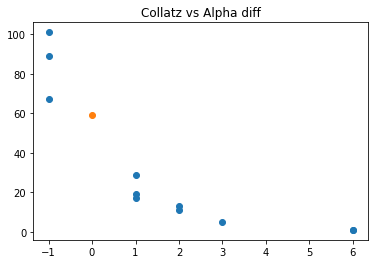

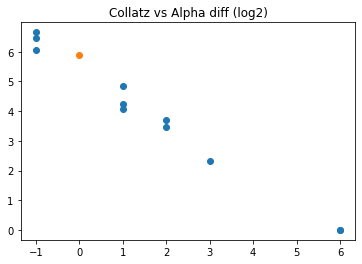

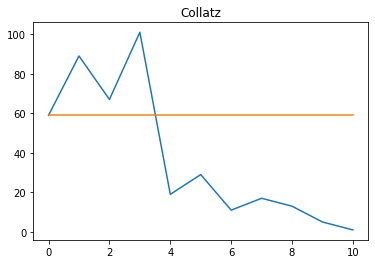

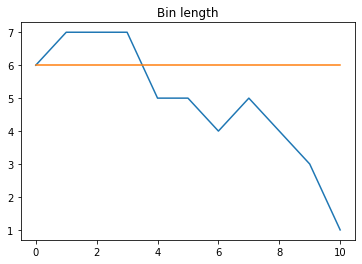

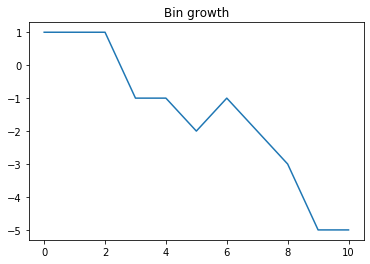

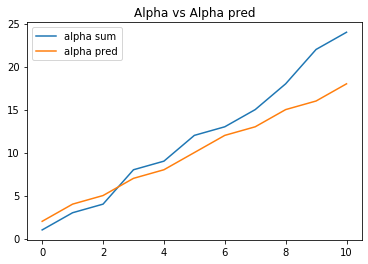

In [2]:
# Plot results
plt.figure()
plt.title("Collatz vs Alpha diff")
plt.plot(analysis_frame["alpha_diff"], analysis_frame["next_odd"],  "o")
plt.plot(0, START_VALUE,  "o")


plt.figure()
plt.title("Collatz vs Alpha diff (log2)")
plt.plot(analysis_frame["alpha_diff"], analysis_frame["next_odd"].apply(log2),  "o")
plt.plot(0, log2(START_VALUE),  "o")

plt.figure()
plt.title("Collatz")
plt.plot(analysis_frame["collatz"], "-")
plt.plot(analysis_frame["v1"])

plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "-")
plt.plot(analysis_frame["bin_len1"], "-")

plt.figure()
plt.title("Bin growth")
plt.plot(analysis_frame["bin_growth"], "-")

plt.figure()
plt.title("Alpha vs Alpha pred")
plt.plot(analysis_frame["alpha_sum"], "-", label="alpha sum")
plt.plot(analysis_frame["alpha_pred"], "-", label="alpha pred")
plt.legend()

plt.show()